### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("/Users/jmadu1/Documents/LSE Accelerator/Course 3/LSE_DA301_assignment_files_new/turtle_reviews.csv")

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Sense check.

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Any missing values?

print(f"Null values: \n {reviews.isnull().sum()}")
print(f"NaN values: \n {reviews.isna().sum()}")

Null values: 
 gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64
NaN values: 
 gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Explore the data.

reviews.shape # 2000 observations, 11 features

(2000, 11)

In [6]:
# Explore the data, part two.

from ydata_profiling import ProfileReport

profile = ProfileReport(reviews).to_widgets()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Basic descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [8]:
# Drop unnecessary columns - language and platform (uniform values across all observations).

reviews.drop(columns=['language', 'platform'], inplace=True)

# View column names.
for item in reviews.columns:
    print(item)

gender
age
remuneration (k£)
spending_score (1-100)
loyalty_points
education
product
review
summary


## 3. Rename columns

In [9]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)':'spending_score'}, inplace=True)

# View column names.
for item in reviews.columns:
    print(item)

gender
age
remuneration
spending_score
loyalty_points
education
product
review
summary


## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews.to_csv("turtle_reviews_cleaned.csv", sep=',', index=False)

In [11]:
# Import new CSV file with Pandas.
reviews_cleaned = pd.read_csv("/Users/jmadu1/Documents/LSE Accelerator/Course 3/LSE_DA301_assignment_files_new/turtle_reviews_cleaned.csv")

# View DataFrame.
reviews_cleaned

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [12]:
# Define independent variable.
X = reviews_cleaned['spending_score'].values.reshape(-1, 1)

# Define dependent variable.
y = reviews_cleaned['loyalty_points'].values.reshape(-1, 1)

# Create model and print summary of metrics.
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
# Set the X coefficient and the constant to generate the regression table.
ols = sm.OLS(y, X)

# View the output.
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              7156.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:50:19   Log-Likelihood:                         -16552.
No. Observations:                2000   AIC:                                  3.311e+04
Df Residuals:                    1999   BIC:                                  3.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.8818      0.377     84.591      0.000      31.143      32.621
==============================================================================
Omnibus:                      156.982   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.057
Skew:                           0.524   Prob(JB):                     4.70e-68
Kurtosis:                       4.619   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Estimated parameters: ", result.params)

# Extract the standard errors.
print("Standard errors: ", result.bse)

# Extract the predicted values.
print("Predicted values: ", result.predict())

Estimated parameters:  [31.88183996]
Standard errors:  [0.37689352]
Predicted values:  [1243.39175839 2582.42903666  191.29103975 ... 2901.24743625  510.10943934
  255.05471967]


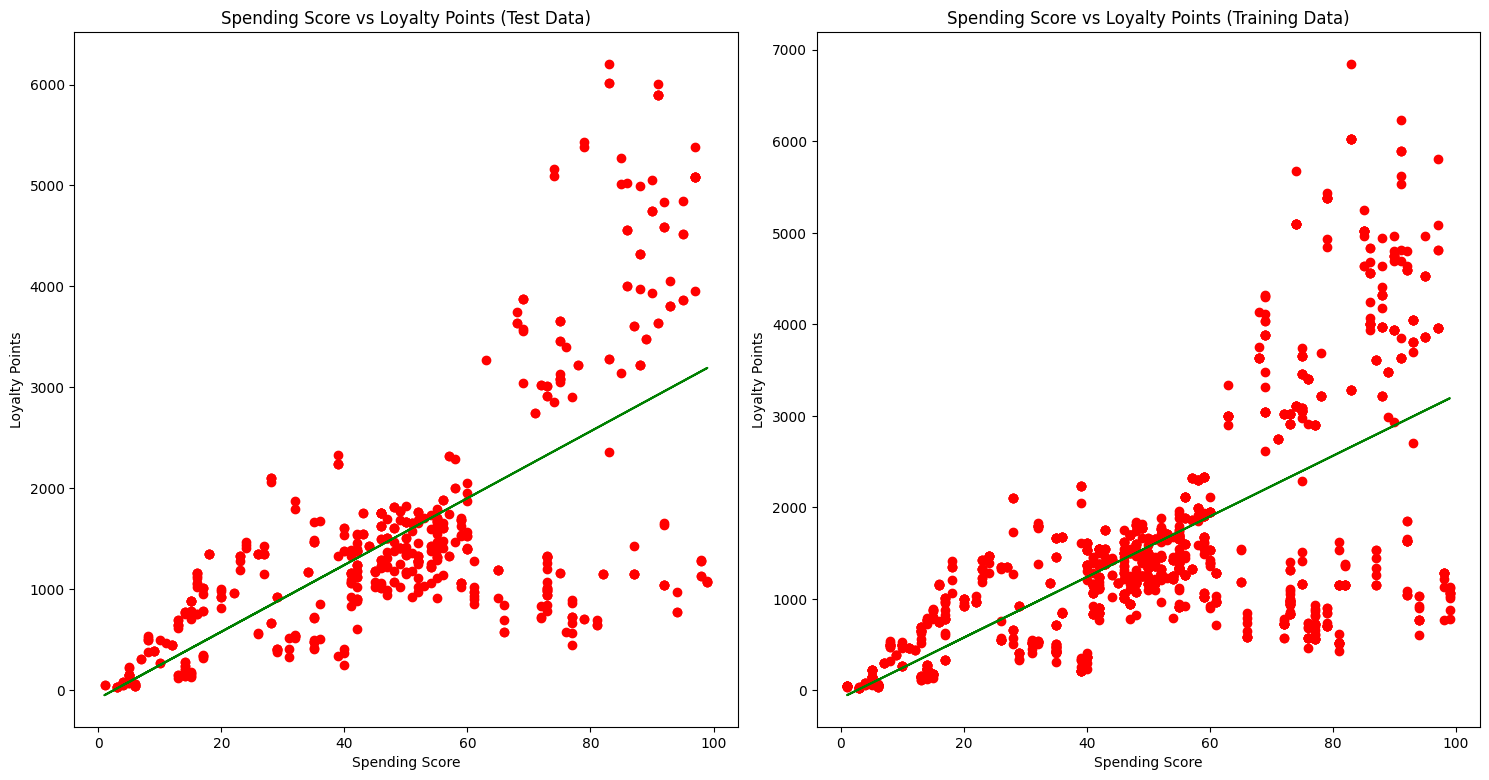

In [15]:
# Plot the graph with a regression line (Training and Test).
%matplotlib inline

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lr.predict(x_test), color = 'green')
plt.title("Spending Score vs Loyalty Points (Test Data)")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.subplot(2,2,2)

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Spending Score vs Loyalty Points (Training Data)")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.tight_layout()
plt.show()

### 5b) renumeration vs loyalty

In [16]:
# Define independent variable.
X_1 = reviews_cleaned['remuneration'].values.reshape(-1, 1)

# Define dependent variable.
y_1 = reviews_cleaned['loyalty_points'].values.reshape(-1, 1)

# Create model and print summary of metrics.
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_1, y_1,
                                                    test_size=0.3,
                                                    random_state=42)

# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train1, y_train1)

LinearRegression()

In [17]:
# Set the X coefficient and the constant to generate the regression table.
ols = sm.OLS(y_1, X_1)

# View the output.
result1 = ols.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              6091.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:50:20   Log-Likelihood:                         -16675.
No. Observations:                2000   AIC:                                  3.335e+04
Df Residuals:                    1999   BIC:                                  3.336e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            33.0782      0.424     78.044      0.000      32.247      33.909
==============================================================================
Omnibus:                       29.676   Durbin-Watson:                   3.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.861
Skew:                           0.177   Prob(JB):                     1.34e-09
Kurtosis:                       3.604   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print("Estimated parameters: ", result1.params)

# Extract the standard errors.
print("Standard errors: ", result1.bse)

# Extract the predicted values.
print("Predicted values: ", result1.predict())

Estimated parameters:  [33.07816516]
Standard errors:  [0.42384038]
Predicted values:  [ 406.86143144  406.86143144  433.98552687 ... 3065.02278349 3254.8914515
 3065.02278349]


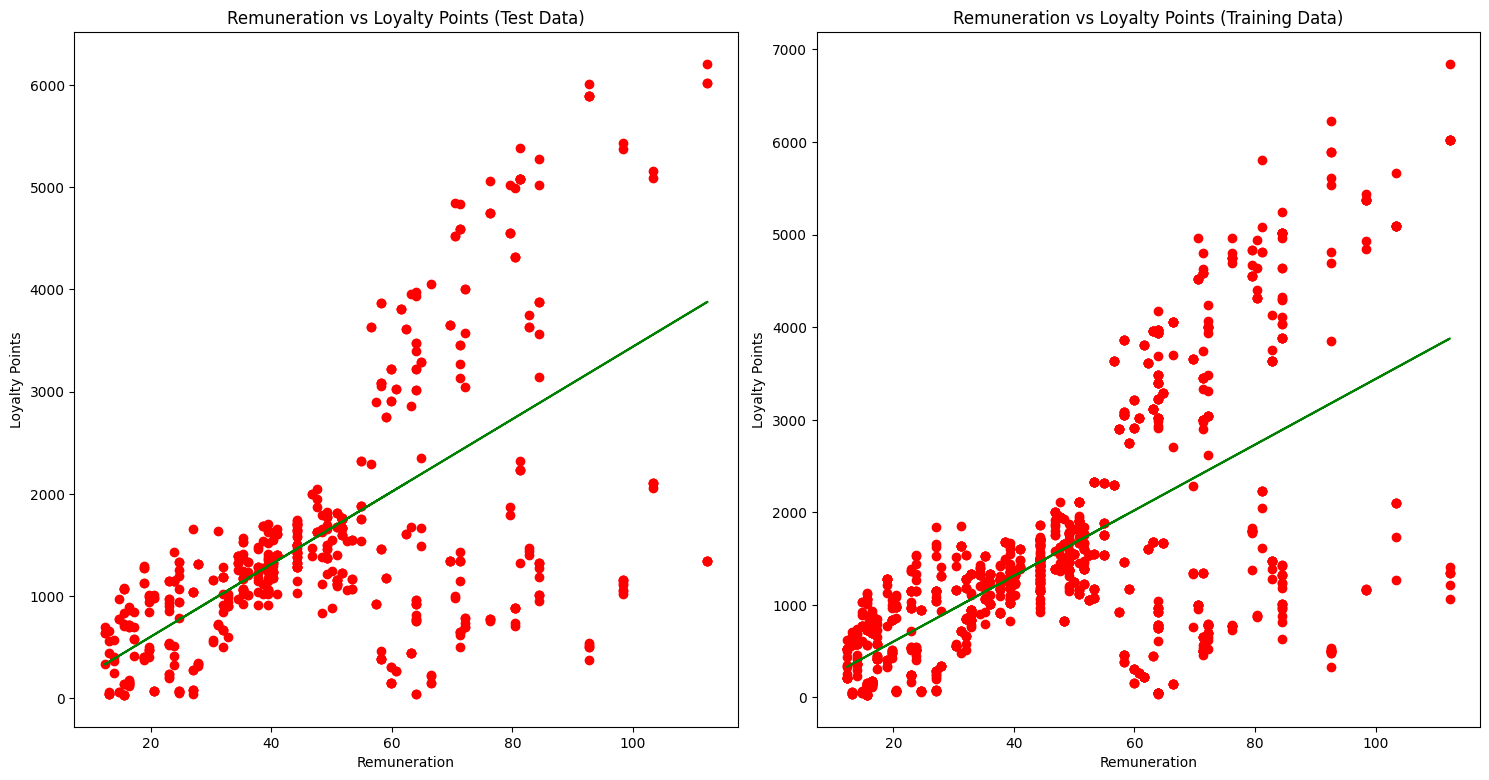

In [19]:
# Plot graph with regression line.
%matplotlib inline

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)

plt.scatter(x_test1, y_test1, color = 'red')
plt.plot(x_test1, lr.predict(x_test1), color = 'green')
plt.title("Remuneration vs Loyalty Points (Test Data)")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

plt.subplot(2,2,2)

plt.scatter(x_train1, y_train1, color = 'red')
plt.plot(x_train1, lr.predict(x_train1), color = 'green')
plt.title("Remuneration vs Loyalty Points (Training Data)")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

plt.tight_layout()
plt.show()

### 5c) age vs loyalty

In [20]:
# Define independent variable.
X_2 = reviews_cleaned['age'].values.reshape(-1, 1)

# Define dependent variable.
y_2 = reviews_cleaned['loyalty_points'].values.reshape(-1, 1)

# Create model and print summary of metrics.
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_2, y_2,
                                                    test_size=0.3,
                                                    random_state=42)

# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train2, y_train2)

LinearRegression()

In [21]:
# Set the X coefficient and the constant to generate the regression table.
ols = sm.OLS(y_2, X_2)

# View the output.
result2 = ols.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.526
Method:                 Least Squares   F-statistic:                              2217.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:50:20   Log-Likelihood:                         -17327.
No. Observations:                2000   AIC:                                  3.466e+04
Df Residuals:                    1999   BIC:                                  3.466e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            35.3129      0.750     47.080      0.000      33.842      36.784
==============================================================================
Omnibus:                      341.176   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.864
Skew:                           1.152   Prob(JB):                    1.78e-119
Kurtosis:                       4.118   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Estimated parameters: ", result2.params)

# Extract the standard errors.
print("Standard errors: ", result2.bse)

# Extract the predicted values.
print("Predicted values: ", result2.predict())

Estimated parameters:  [35.31286271]
Standard errors:  [0.75005615]
Predicted values:  [ 635.63152876  812.1958423   776.8829796  ... 1200.6373321  1200.6373321
 1130.01160668]


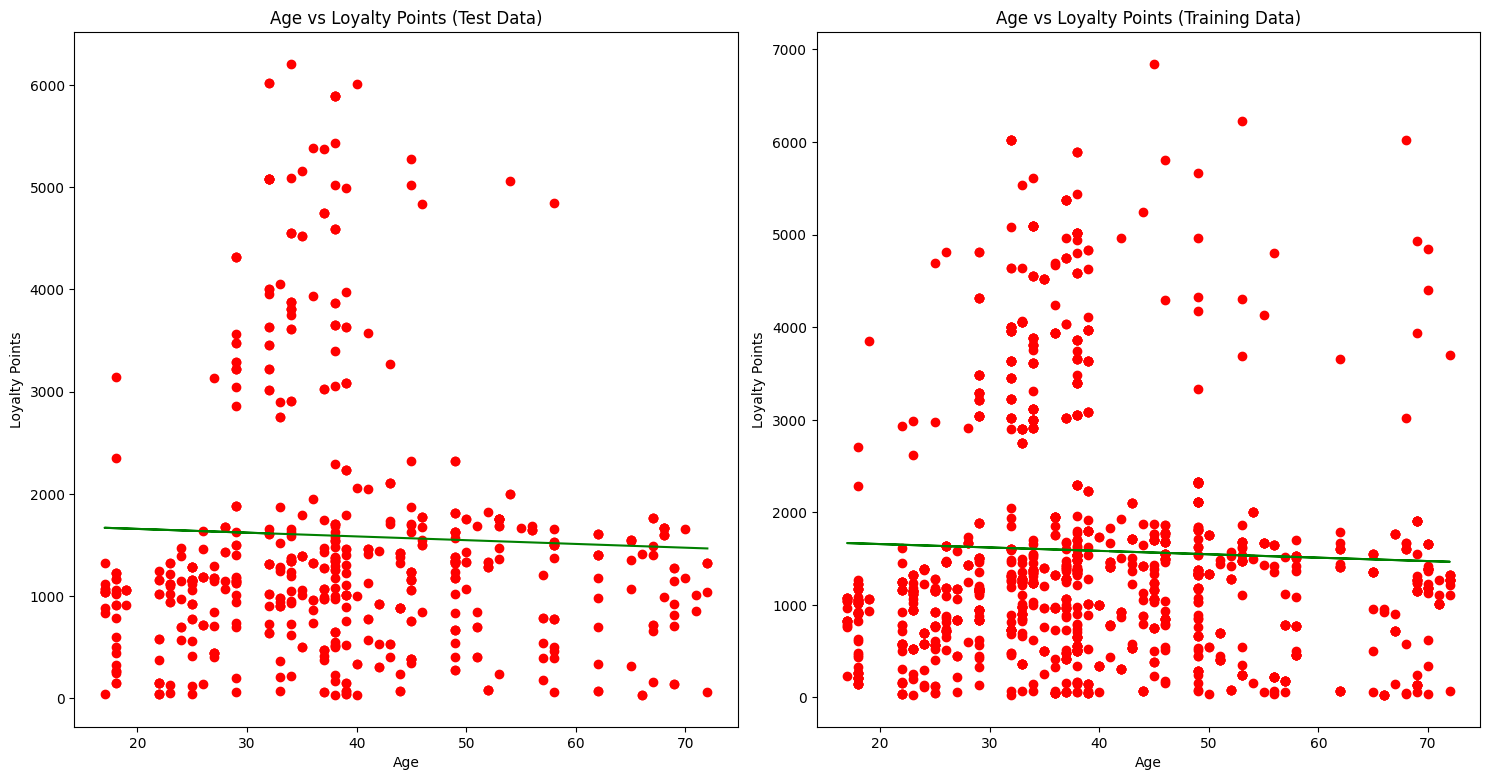

In [23]:
# Plot graph with regression line.
%matplotlib inline

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)

plt.scatter(x_test2, y_test2, color = 'red')
plt.plot(x_test2, lr.predict(x_test2), color = 'green')
plt.title("Age vs Loyalty Points (Test Data)")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.subplot(2,2,2)

plt.scatter(x_train2, y_train2, color = 'red')
plt.plot(x_train2, lr.predict(x_train2), color = 'green')
plt.title("Age vs Loyalty Points (Training Data)")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.tight_layout()
plt.show()

# Week 2 assignment: Exploring the structure using decision trees.

## 1. Load and prepare the data

In [24]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [25]:
# Create your new DataFrame.
df2 = pd.read_csv("/Users/jmadu1/Documents/LSE Accelerator/Course 3/LSE_DA301_assignment_files_new/turtle_reviews_cleaned.csv")
df2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [26]:
# Specify Y.
y = df2['loyalty_points']

# Specify X.
#ols = df2[['age', 'remuneration', 'spending_score', 'product']]
X = df2[['age', 'remuneration', 'spending_score', 'product']]

In [27]:
# Review X and Y.
print(y)
print(X)

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64
      age  remuneration  spending_score  product
0      18         12.30              39      453
1      23         12.30              81      466
2      22         13.12               6      254
3      25         13.12              77      263
4      33         13.94              40      291
...   ...           ...             ...      ...
1995   37         84.46              69      977
1996   43         92.66               8      979
1997   34         92.66              91     1012
1998   34         98.40              16     1031
1999   32         92.66               8      453

[2000 rows x 4 columns]


## 2. Create train and test data sets.

In [28]:
# Split the data into test and train data.

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# make sure x train and x test come before the y's!!!!!!

## 3. Create Decision tree regressor

In [29]:
# Create your decision tree regressor.
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [30]:
regressor = DecisionTreeRegressor(random_state=42)

In [31]:
print(len(x_train), len(y_train))

1400 1400


In [32]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
# Evaluate the model.

import math

y_predict = regressor.predict(x_test)

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error: ",math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error:  32.596666666666664
Mean Squared Error:  8589.426666666666
Root Mean Squared Error:  92.67915982930934


<AxesSubplot:>

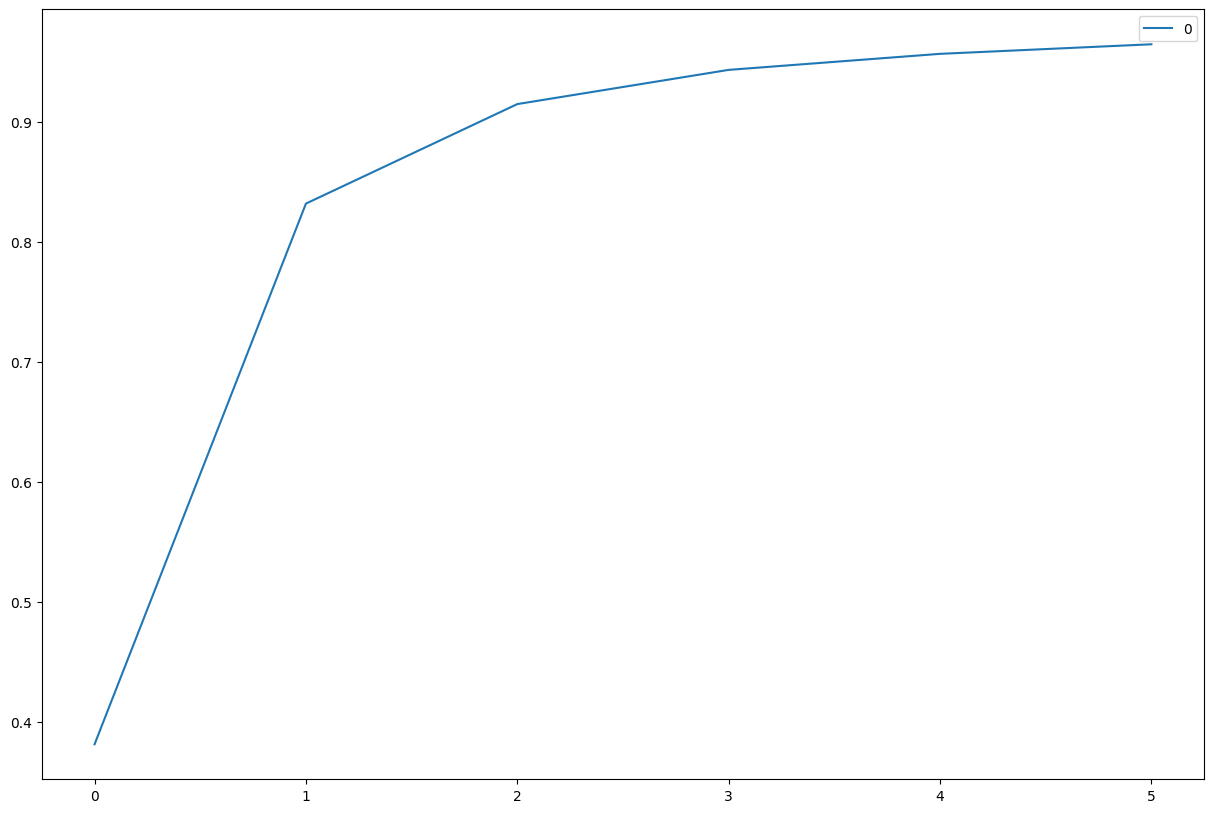

In [34]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 7))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:

    dtct = DecisionTreeRegressor(max_depth = depth, random_state = 10)
    dtct.fit(x_train, y_train)
    score = dtct.score(x_test, y_test)
    accuracy.append(score)

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot()

In [35]:
# Prune the model.
# Create final model: decision tree classifier object as dtcf.
dtcf = DecisionTreeRegressor(max_depth=3,
                             random_state=1)

# Train the decision tree classifier.
dtcf = dtcf.fit(x_train, y_train)

# Predict the response for the test data set.
y_pred = dtcf.predict(x_test)

## 4. Fit and plot final model.

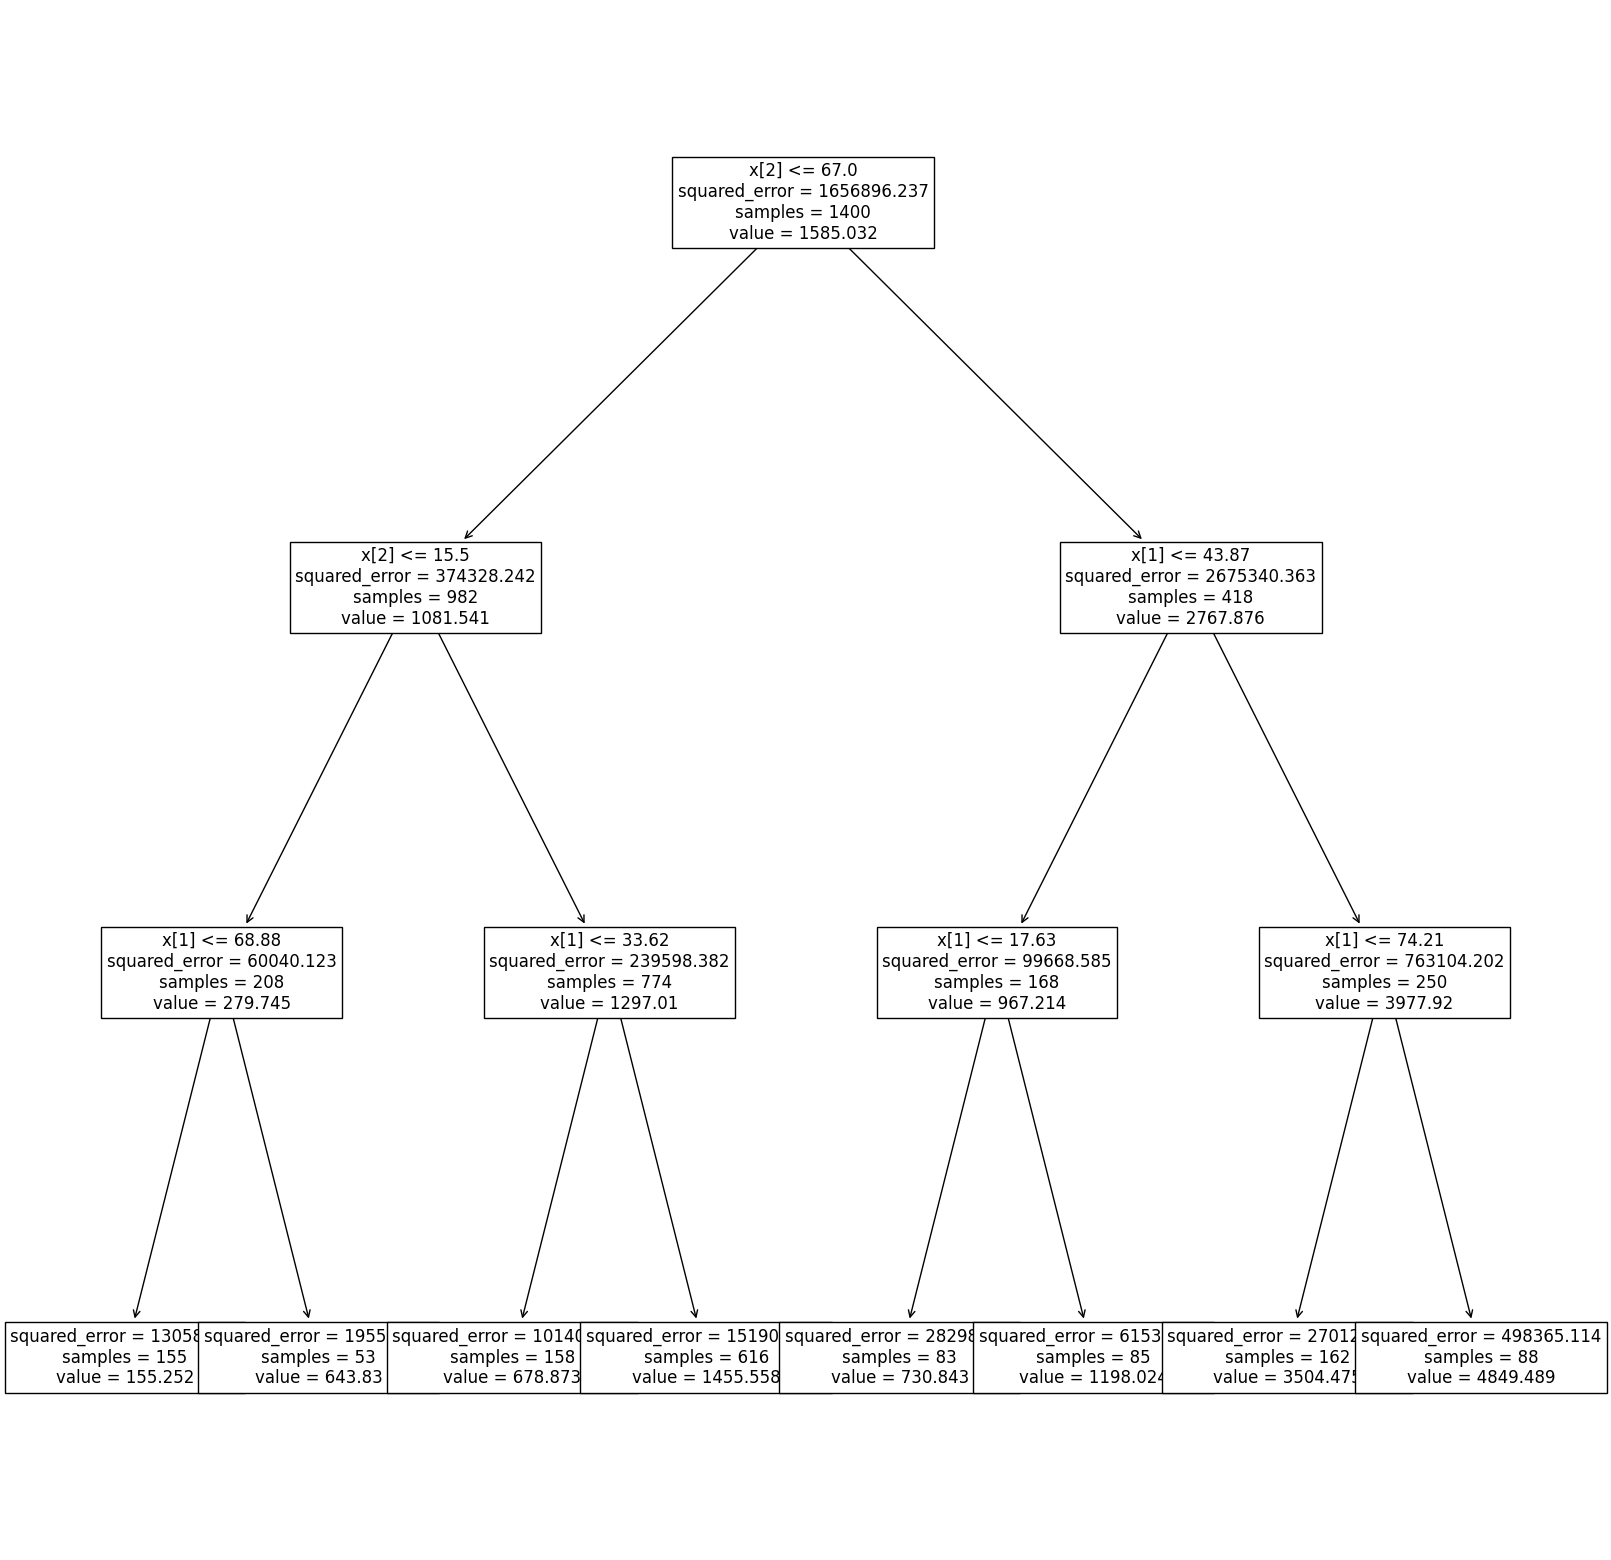

In [36]:
# Fit and plot final model.

from sklearn import tree

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dtcf, fontsize=12)

# Save a copy of the output.
plt.savefig('dtcf.png')

# Print the plot with plt.show().
plt.show()

## 5. Discuss: Insights and observations

***Your observations here...***

In [37]:
# Interpret model and note observations.


# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [38]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load the CSV file(s) as df2.
df3 = pd.read_csv("/Users/jmadu1/Documents/LSE Accelerator/Course 3/LSE_DA301_assignment_files_new/turtle_reviews_cleaned.csv")

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [40]:
# Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df3

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [41]:
# Explore the data.
print("Nulls: \n", df3.isnull().sum())
print("NAs: \n", df3.isna().sum())

Nulls: 
 remuneration      0
spending_score    0
dtype: int64
NAs: 
 remuneration      0
spending_score    0
dtype: int64


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [43]:
# Descriptive statistics.
print("Descriptive Statistics: \n", df3.describe())

Descriptive Statistics: 
        remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

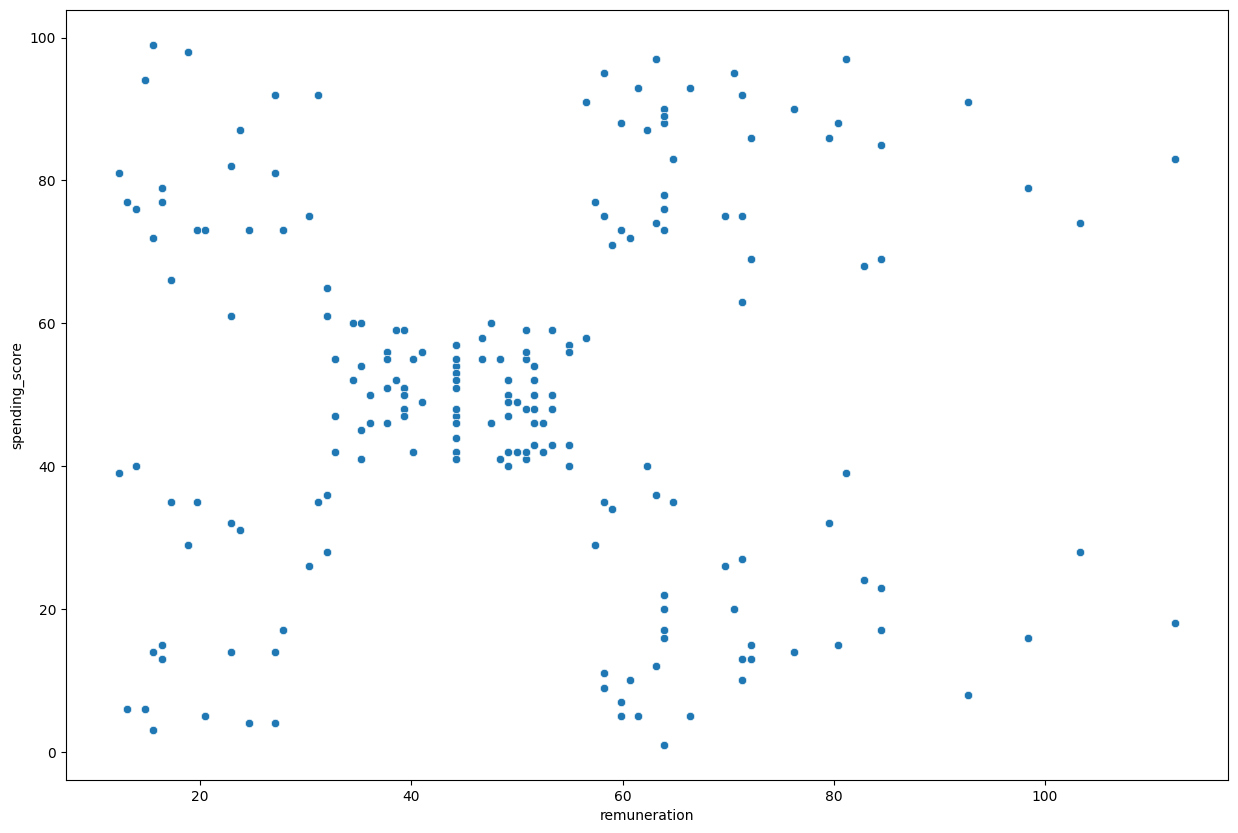

In [44]:
# Create a scatterplot with Seaborn.

from matplotlib import pyplot as plt
import seaborn as sns


sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df3)

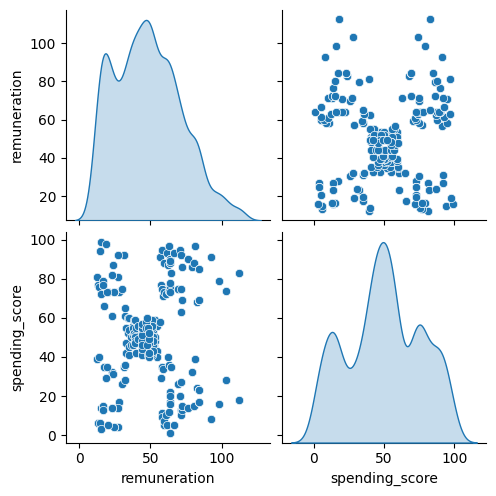

In [45]:
# Create a pairplot with Seaborn.

sns.pairplot(df3,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

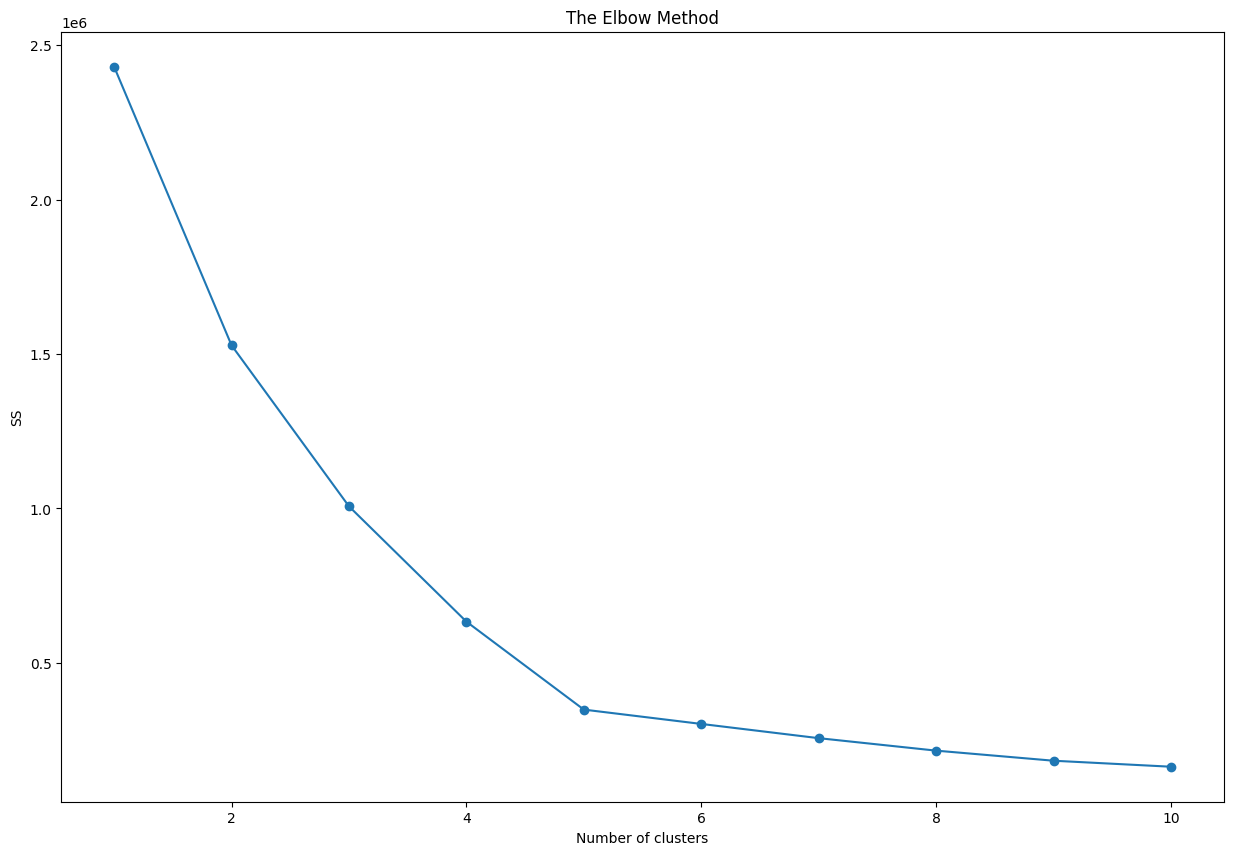

In [46]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df3)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

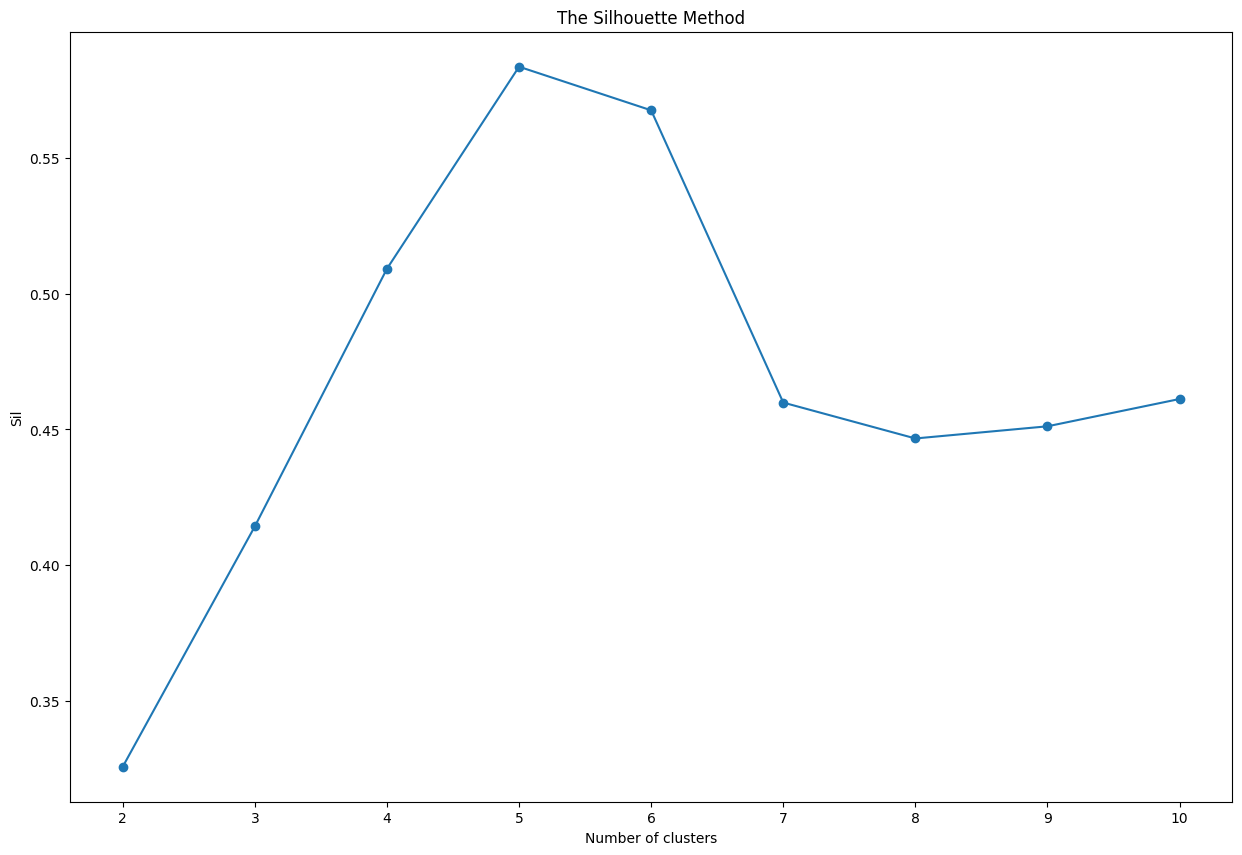

In [47]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df3)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df3,
                                labels,
                                metric = 'euclidean'))

plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

In [48]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df3)

In [49]:
clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters

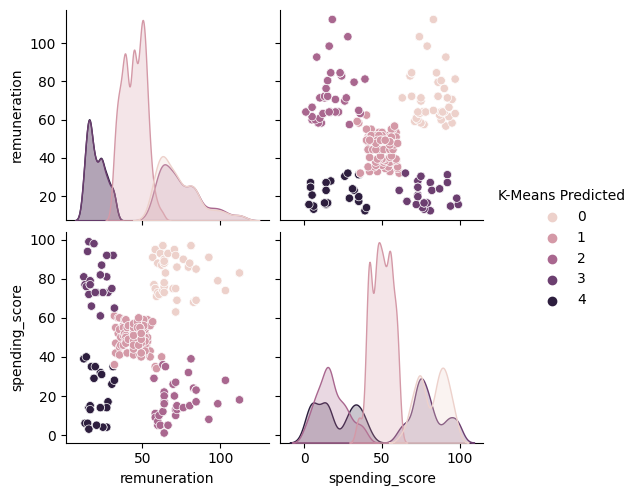

In [50]:
# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [51]:
# Number of observations per predicted class
df3['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [52]:
print(df3.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

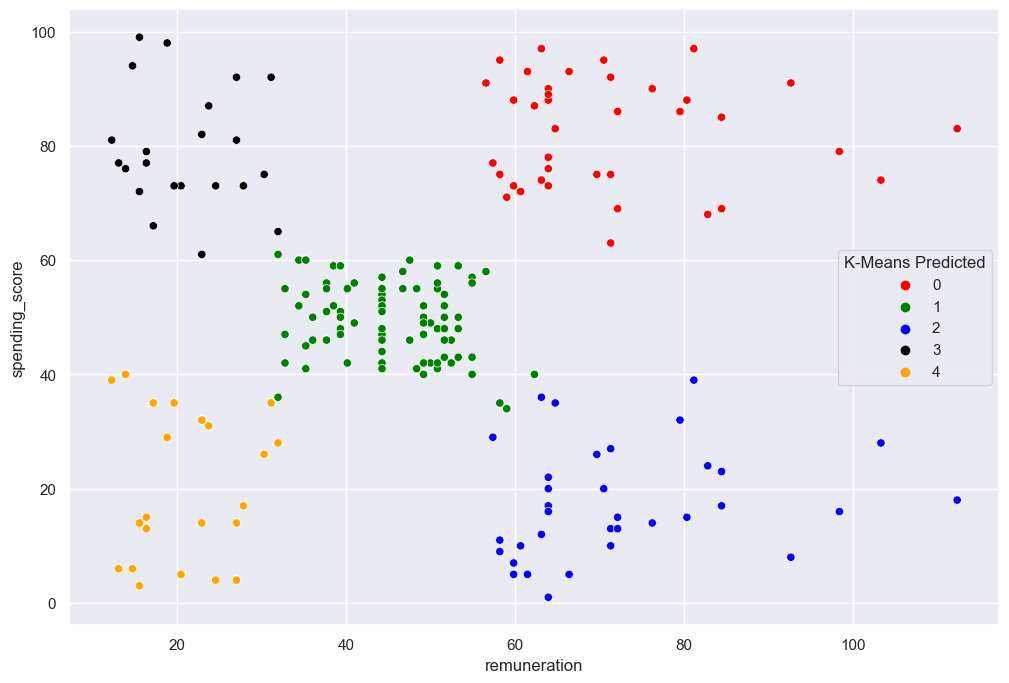

In [53]:
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' ,
                y ='spending_score',
                data=df3 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

In [54]:
# Using 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df3)

In [55]:
clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters

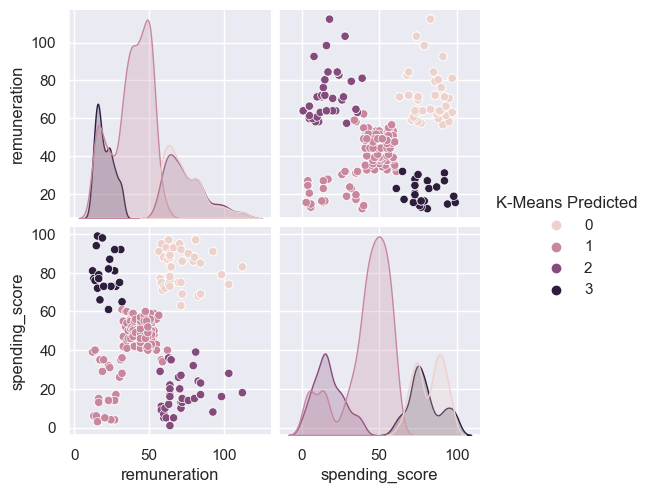

In [56]:
# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [57]:
# Number of observations per predicted class
df3['K-Means Predicted'].value_counts()

1    1045
0     356
2     330
3     269
Name: K-Means Predicted, dtype: int64

In [58]:
print(df3.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  3
2         13.12               6                  1
3         13.12              77                  3
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

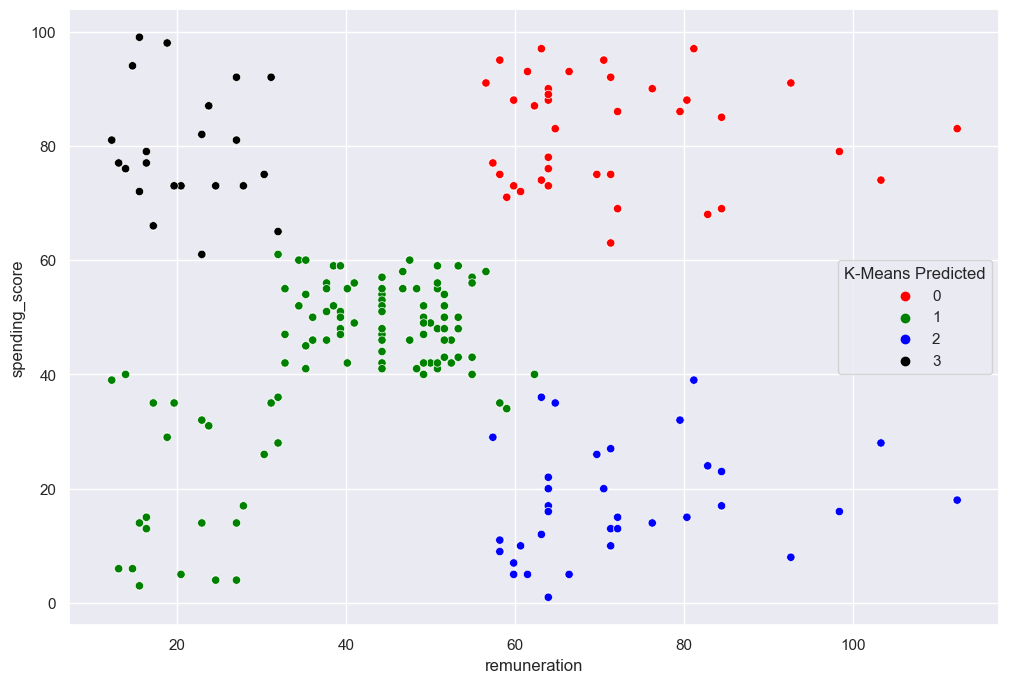

In [59]:
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' ,
                y ='spending_score',
                data=df3 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 5. Fit final model and justify your choice

FINAL MODEL - FIVE CLUSTERS

In [60]:
# Apply the final model.

kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df3)

clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters


In [61]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


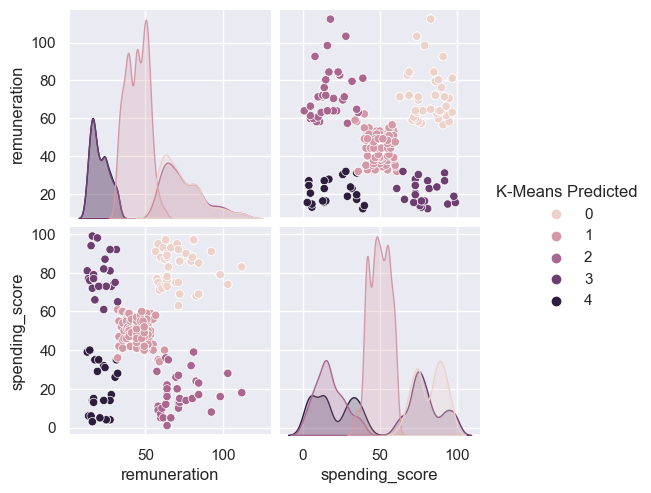

In [62]:
# Visualising the clusters.

sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# View the DataFrame.
print(df3.head())

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

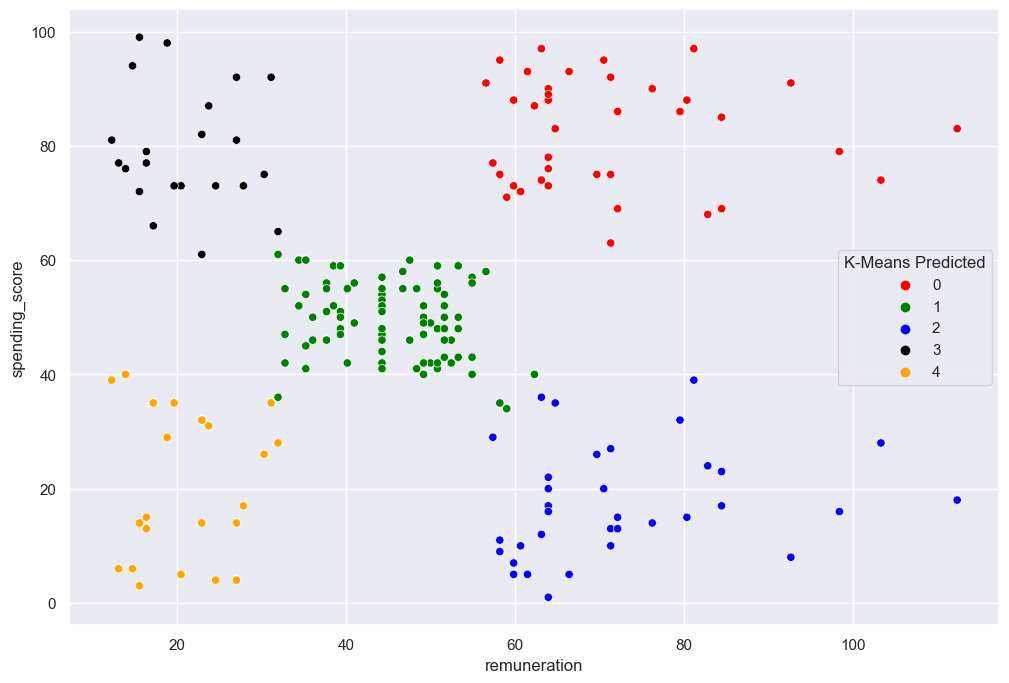

In [63]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' ,
                y ='spending_score',
                data=df3 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [64]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load the data set as df3.
df3 = pd.read_csv("/Users/jmadu1/Documents/LSE Accelerator/Course 3/LSE_DA301_assignment_files_new/turtle_reviews_cleaned.csv")

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [66]:
# Explore data set.
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [67]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 'remuneration', 'spending_score','loyalty_points', 'education', 'product'])

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [68]:
# Determine if there are any missing values.
print("Null values:\n", df3.isnull().sum())

Null values:
 review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [69]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [70]:
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [71]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [72]:
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [73]:
df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [74]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [75]:
# Replace all the punctuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [76]:
print(f"Summary duplicates: {df3.summary.duplicated().sum()}")
print(f"Review duplicates: {df3.review.duplicated().sum()}")

Summary duplicates: 649
Review duplicates: 50


In [77]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.

df3.reset_index(inplace=True)
df3.head()


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1961 non-null   int64 
 1   review   1961 non-null   object
 2   summary  1961 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.1+ KB


In [79]:
df3.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [80]:
# Create new DataFrame (copy DataFrame).
df3_1 = df3.copy()

# View DataFrame.
df3_1

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [81]:
df3_1 = df3_1.drop(columns='index')
df3_1

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars


In [82]:
df3_1.shape[1]

2

In [83]:
# Apply tokenisation to both columns.

all_reviews = ''
for i in range(df3_1.shape[0]):
    all_reviews = all_reviews + df3_1['review'][i]

all_summaries = ''
for i in range(df3_1.shape[0]):
    all_summaries = all_summaries + df3_1['summary'][i]

# View DataFrame.
df3_1

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars


In [84]:
print(all_reviews)
print(all_summaries)

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could ha

In [85]:
# Review: Create a word cloud.

sns.set_theme(color_codes=True)

font_path = '/System/Library/Fonts/Supplemental/Telugu MN.ttc'

word_cloud_review = WordCloud(width = 1600, height = 900,
                background_color ='white',
                colormap = 'plasma',
                stopwords = 'none',
                font_path=font_path,
                min_font_size = 10).generate(all_reviews)

ValueError: Only supported for TrueType fonts

In [199]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud_review)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

NameError: name 'word_cloud_review' is not defined

<Figure size 1600x900 with 0 Axes>

In [ ]:
# Summary: Create a word cloud.
# n/a

In [ ]:
# Summary: Plot the WordCloud image.
# n/a

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [86]:
# Determine the frequency distribution.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/jmadu1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
# Tokenize review

df3_1['review_tokens'] = df3_1['review'].apply(word_tokenize)
df3_1['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [88]:
# Tokenize summary
df3_1['summary_tokens'] = df3_1['summary'].apply(word_tokenize)
df3_1['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [89]:
review_tokens = []

for i in range(df3_1.shape[0]):
    review_tokens = review_tokens + df3_1['review_tokens'][i]

summary_tokens = []

for i in range(df3_1.shape[0]):
    summary_tokens = summary_tokens + df3_1['summary_tokens'][i]

In [90]:
print(review_tokens)
print(summary_tokens)

['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on', 'the', 'screen', 'itself', 'is', 'at', 'an', 'absolute', 'premium', 'the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on', 'art', 'and', 'not', 'terribly', 'informative', 'or', 'needed', 'art', 'as', 'well', 'makes', 'it', 'completely', 'useless', 'the', 'only', 'reason', 'that', 'i', 'gave', 'it', '2', 'stars', 'and', 'not', '1', 'was', 'that', 'technically', 'speaking', 'it', 'can', 'at', 'least', 'still', 'stand', 'up', 'to', 'block', 'your', 'notes', 'and', 'dice', 'rolls', 'other', 'than', 'that', 'it', 'drops', 'the', 'ball', 'completely', 'an', 'open', 'letter', 'to', 'galeforce9', 'your', 'unpainted', 'miniatures', 'are', 'very', 'not', 'bad', 'your', 'spell', 'cards', 'are', 'great', 'your', 'board', 'games', 'are', 'meh', 'your', 'dm', 'screens', 'however', 'are', 'freaking', 'terrible', 'im', 'still', 'waiting', 'for', 'a', 'single', 'screen', 'that', 'isnt', 'polluted', 'with', 'poi

In [91]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_review = FreqDist(review_tokens)
fdist_summary = FreqDist(summary_tokens)

In [92]:
# Preview data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [93]:
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [94]:
# Delete all the alpanum.
tokens_r = [word for word in review_tokens if word.isalnum()]
tokens_r

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [95]:
# Delete all the alpanum.
tokens_s = [word for word in summary_tokens if word.isalnum()]
tokens_s

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [96]:
# Remove all the stopwords

nltk.download ('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jmadu1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
english_stopwords = set(stopwords.words('english'))

In [98]:
# review
tokens2_r = [x for x in tokens_r if x.lower() not in english_stopwords]

tokens2_string_r = ''

for value in tokens_r:
    tokens2_string_r = tokens2_string_r + value + ' '

In [99]:
# summary
tokens2_s = [x for x in tokens_s if x.lower() not in english_stopwords]

tokens2_string_s = ''

for value in tokens_s:
    tokens2_string_s = tokens2_string_s + value + ' '

### 4c) Create wordcloud without stopwords

In [100]:
# Create a wordcloud without stop words.
wordcloud_r = WordCloud(width = 1600, height = 900,
                background_color ='white',
                colormap='plasma',
                min_font_size = 10).generate(tokens2_string_r)

ValueError: Only supported for TrueType fonts

In [ ]:
# Plot the wordcloud image.

# Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Note that your word cloud might differ slightly to the one provided.

### 4d) Identify 15 most common words and polarity

In [101]:
# Determine the 15 most common words - review
counts_r = pd.DataFrame(Counter(tokens2_r).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_r

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


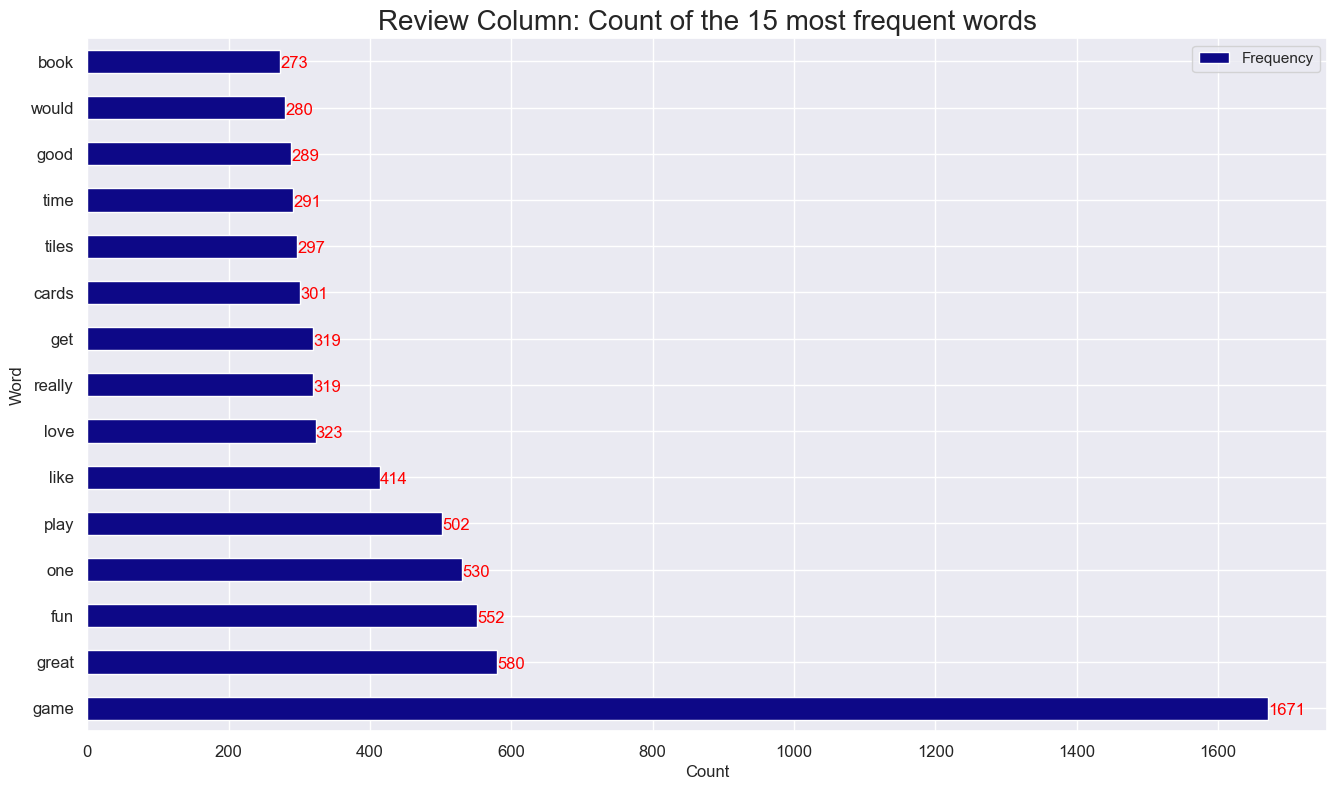

In [103]:
# Set the plot type.
ax = counts_r.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review Column: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [102]:
# Determine the 15 most common words - summary
counts_s = pd.DataFrame(Counter(tokens2_s).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_s

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


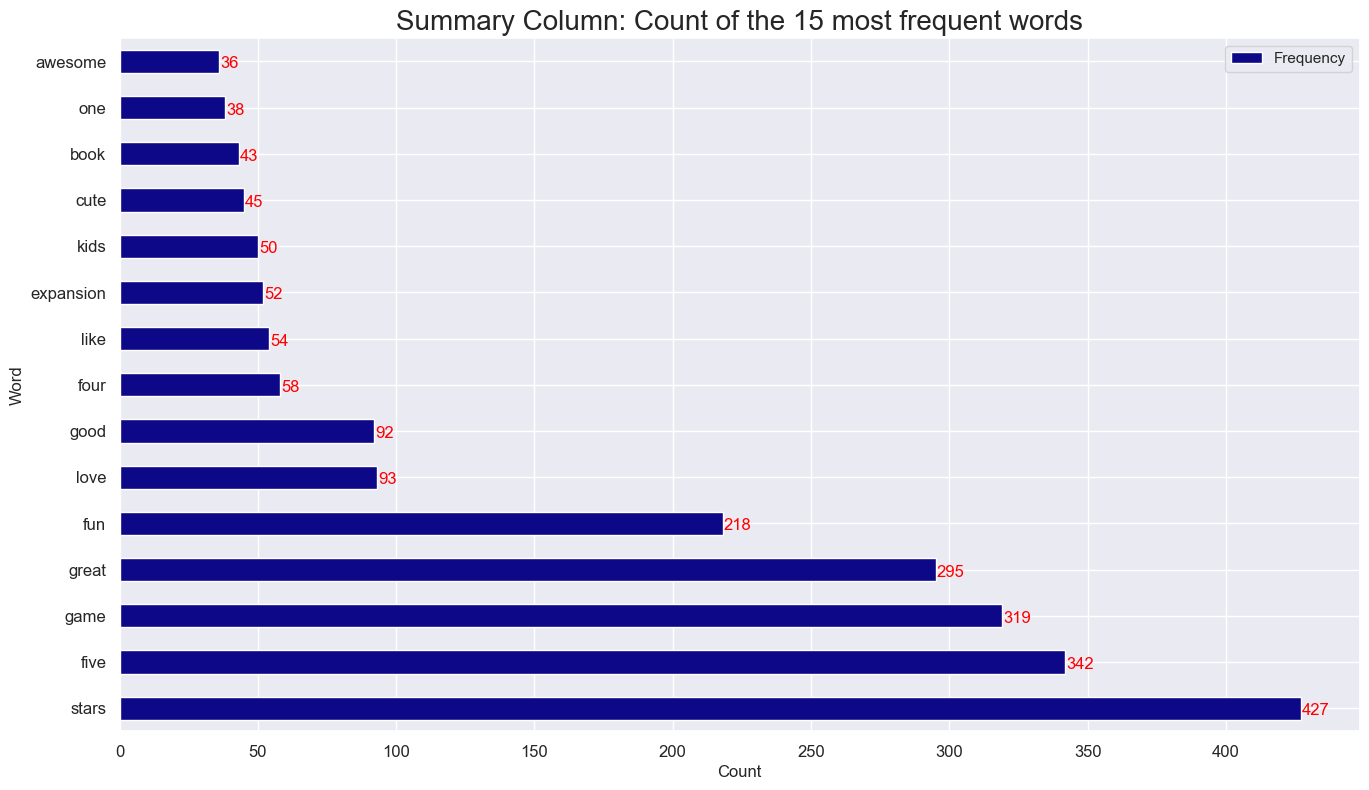

In [104]:
# Set the plot type.
ax = counts_s.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary Column: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [111]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [115]:
# Determine polarity of both columns.

df3_1['polarity_review'] = df3_1['review'].apply(generate_polarity)
df3_1['polarity_summary'] = df3_1['summary'].apply(generate_polarity)


# View output.
df3_1

,review,summary,review_tokens,summary_tokens,polarity_review,polarity_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000
1957,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667
1958,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000
1959,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000


In [119]:
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [120]:
df3_1['sentiment_review'] = df3_1['review'].apply(generate_subjectivity)
df3_1['sentiment_summary'] = df3_1['summary'].apply(generate_subjectivity)

In [121]:
df3_1

,review,summary,review_tokens,summary_tokens,polarity_review,polarity_summary,sentiment_review,sentiment_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000,0.486111,0.500000
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000,0.442976,0.900000
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000,0.430435,0.733333
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000,0.784848,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000,0.316667,0.000000
...,...,...,...,...,...,...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000,0.491667,0.550000
1957,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667,0.310043,0.433333
1958,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000,0.575000,0.575000
1959,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000,0.300000,0.000000


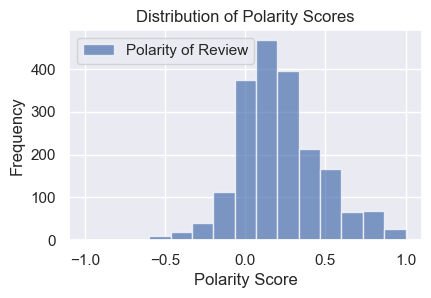

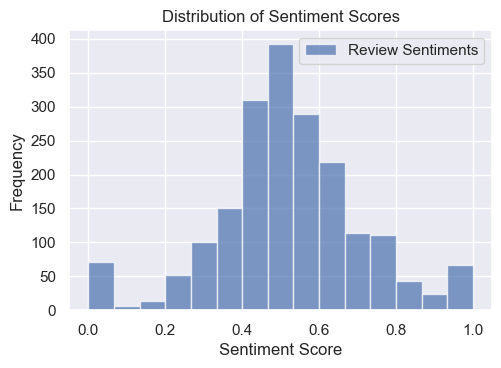

In [122]:
# Review: Create a histogram plot with bins = 15.

# Histogram of polarity

plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.hist(df3_1['polarity_review'], bins=15, alpha=0.7, label='Polarity of Review')

plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

plt.legend()

plt.show()


# Histogram of sentiment score

plt.subplot(2,2,2)
plt.hist(df3_1['sentiment_review'], bins=15, alpha=0.7, label='Review Sentiments')

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.legend()

plt.show()

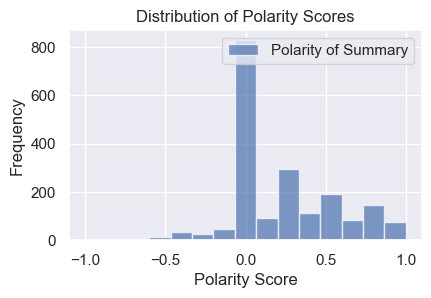

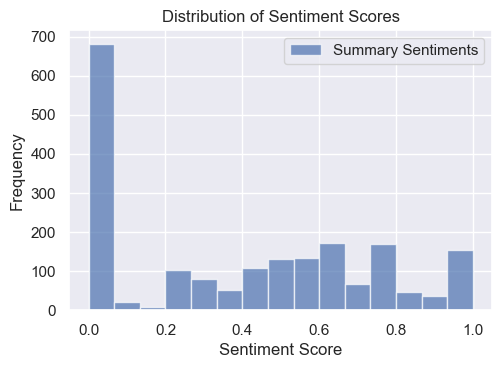

In [123]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.hist(df3_1['polarity_summary'], bins=15, alpha=0.7, label='Polarity of Summary')

plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

plt.legend()

plt.show()

# Histogram of sentiment score

plt.subplot(2,2,2)
plt.hist(df3_1['sentiment_summary'], bins=15, alpha=0.7, label='Summary Sentiments')

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.legend()

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [125]:
# Top 20 negative reviews.

# Create a DataFrame.
neg_sentiment_review = df3_1.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
neg_sentiment_review = neg_sentiment_review[['review', 'polarity_review', 'sentiment_review']]

# Adjust the column width.
#neg_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
neg_sentiment_review

,review,polarity_review,sentiment_review
207,booo unles you are patient know how to measure...,-1.000000,1.000000
181,incomplete kit very disappointing,-0.780000,0.910000
1773,im sorry i just find this product to be boring...,-0.583333,0.750000
362,one of my staff will be using this game soon s...,-0.550000,0.300000
116,i bought this as a christmas gift for my grand...,-0.500000,0.900000
226,this was a gift for my daughter i found it dif...,-0.500000,1.000000
229,i found the directions difficult,-0.500000,1.000000
289,instructions are complicated to follow,-0.500000,1.000000
300,difficult,-0.500000,1.000000
1501,expensive for what you get,-0.500000,0.700000


In [126]:
# Top 20 negative summaries.

# Create a DataFrame.
neg_sentiment_summary = df3_1.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
neg_sentiment_summary = neg_sentiment_summary[['summary', 'polarity_summary', 'sentiment_summary']]

# Adjust the column width.
#neg_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
neg_sentiment_summary

,summary,polarity_summary,sentiment_summary
21,the worst value ive ever seen,-1.000000,1.000000
207,boring unless you are a craft person which i am,-1.000000,1.000000
819,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign d...,-0.900000,0.700000
1,another worthless dungeon masters screen from ...,-0.800000,0.900000
143,disappointed,-0.750000,0.750000
623,disappointed,-0.750000,0.750000
785,disappointed,-0.750000,0.750000
1591,disappointed,-0.750000,0.750000
361,promotes anger instead of teaching calming met...,-0.700000,0.200000


In [127]:
# Top 20 positive reviews.
# Create a DataFrame.
pos_sentiment_review = df3_1.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
pos_sentiment_review = pos_sentiment_review[['review', 'polarity_review', 'sentiment_review']]

# Adjust the column width.
#pos_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
pos_sentiment_review

,review,polarity_review,sentiment_review
7,came in perfect condition,1.0,1.0
164,awesome book,1.0,1.0
193,awesome gift,1.0,1.0
489,excellent activity for teaching selfmanagement...,1.0,1.0
517,perfect just what i ordered,1.0,1.0
583,wonderful product,1.0,1.0
601,delightful product,1.0,1.0
613,wonderful for my grandson to learn the resurre...,1.0,1.0
782,perfect,1.0,1.0
923,awesome,1.0,1.0


In [129]:
# Top 20 positive summaries.
# Create a DataFrame.
pos_sentiment_summary = df3_1.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
pos_sentiment_summary = pos_sentiment_summary[['summary', 'polarity_summary', 'sentiment_summary']]

# Adjust the column width.
#pos_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
pos_sentiment_summary

,summary,polarity_summary,sentiment_summary
6,best gm screen ever,1.0,0.3
28,wonderful designs,1.0,1.0
32,perfect,1.0,1.0
80,theyre the perfect size to keep in the car or ...,1.0,1.0
133,perfect for preschooler,1.0,1.0
139,awesome sticker activity for the price,1.0,1.0
160,awesome book,1.0,1.0
162,he was very happy with his gift,1.0,1.0
186,awesome,1.0,1.0
209,awesome and welldesigned for 9 year olds,1.0,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

# 